In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/Luisa/.pyenv/versions/3.7.12/envs/BDL-A1/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Read Dataset
df = pd.read_parquet('../data/final_dataset_v2.parquet')
df.head()

,index,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Albany,2020-03-26,171,0.000543,0,0.000000,314848,0.0,0.0,...,80.0,43.0,3.795482,0.254091,-51.0,-11.0,43.0,-53.0,-55.0,23.0
1,110535,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
2,110536,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
3,110537,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
4,110538,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0


In [3]:
# Set Facility Name and Date as indexes 
df_sorted = df.copy()
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted = df.sort_values(by=['Facility Name','date']).set_index(['Facility Name','date'])
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted.head()

county  daily_cases  \
Facility Name              date                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  Otsego            3   
                           2020-03-27  Otsego            5   
                           2020-03-28  Otsego            7   
                           2020-03-29  Otsego           10   
                           2020-03-30  Otsego           17   

                                       daily_cases_by_population  \
Facility Name              date                                    
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.000051   
                           2020-03-27                   0.000085   
                           2020-03-28                   0.000120   
                           2020-03-29                   0.000171   
                           2020-03-30                   0.000290   

                                       daily_deaths  \
Facility Name              date                       
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0   
                           2020-03-27             0   
                           2020-03-28             1   
                           2020-03-29             1   
                           2020-03-30             1   

                                       daily_deaths_by_population  POP2020  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                    0.000000    58524   
                           2020-03-27                    0.000000    58524   
                           2020-03-28                    0.000017    58524   
                           2020-03-29                    0.000017    58524   
                           2020-03-30                    0.000017    58524   

                                       Partially Vaccinated  Fully Vaccinated  \
Facility Name              date                                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.0               0.0   
                           2020-03-27                   0.0               0.0   
                           2020-03-28                   0.0               0.0   
                           2020-03-29                   0.0               0.0   
                           2020-03-30                   0.0               0.0   

                                       Non Vaccinated  \
Facility Name              date                         
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0.0   
                           2020-03-27             0.0   
                           2020-03-28             0.0   
                           2020-03-29             0.0   
                           2020-03-30             0.0   

                                       Partially Vaccinated per Population  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                  0.0   
                           2020-03-27                                  0.0   
                           2020-03-28                                  0.0   
                           2020-03-29                                  0.0   
                           2020-03-30                                  0.0   

                                       ...  Number of ICU Beds By County  \
Facility Name              date        ...                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  ...                          14.0   
                           2020-03-27  ...                          14.0   
                           2020-03-28  ...                          14.0   
                           2020-03-29  ...                          14.0   
                           2020-03-30  ...                          14.0   

                                       Number of ICU Beds Available By County  \
Facility Name              date                                  

In [5]:
def prepare_input_data(df, train_start_date, train_end_date, test_start_date, test_end_date,
                        features, features_diff, nshift=4, forecast=14):

    subset = df.copy()
    subset['day_of_week'] = subset.index.get_level_values('date').dayofweek
    subset['day_of_month'] = subset.index.get_level_values('date').day
    subset['overload'] = subset['Number of Beds Available'] + \
        subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

    # diff column with difference between yesterday and day
    diff_cols = []
    for i in range(1, nshift):
        subset.loc[:, 'overload_T-' +
                str(i)] = subset.groupby(level=0)['overload'].shift(i)
        subset.loc[:, 'overload_T-' +
                str(i) + '_diff'] = subset.groupby(level=0)['overload_T-'+str(i)].diff()
        diff_cols.append('overload_T-' +
                        str(i))
        diff_cols.append('overload_T-'+str(i) + '_diff')

    for col in features_diff:
        subset.loc[:, col+'_diff'] = subset.groupby(level=0)[col].diff()
        # diff_cols.append(col)
        diff_cols.append(col+'_diff')

    # overload days in future
    subset.loc[:, f'overload-{forecast}day'] = subset.groupby(level=0)['overload'].shift(forecast)
    # dropping NAs
    subset = subset.dropna()

    target = f'overload-{forecast}day'
    cols = features + diff_cols

    subset = subset[cols]

    # subset date range
    subset_test = subset[(subset.index.get_level_values('date') > test_start_date) & (subset.index.get_level_values('date') <= test_end_date)]

    subset = subset[(subset.index.get_level_values('date') >= train_start_date) & (subset.index.get_level_values('date') <= train_end_date)]

    return subset, subset_test, target

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics

models = []

features_diff = ['Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated', 'daily_cases',
                    'daily_deaths', 'Patients Age 65 to 74 Years', 'Patients Age 55 to 64 Years',
                     'Patients Currently Hospitalized', 'Patients Age 55 to 64 Years']

features = ['overload-14day', 'overload', 'day_of_week', 'day_of_month',
            'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']

models.append(('LR', LinearRegression(), features, features_diff))
# models.append(('NN', MLPRegressor(solver='lbfgs')))  # neural network
# models.append(('KNN', KNeighborsRegressor()))

# features_diff = ['Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated', 'daily_cases',
#                     'daily_deaths', 'Patients Age 65 to 74 Years', 'Patients Age 55 to 64 Years',
#                      'Patients Currently Hospitalized', 'Patients Age 55 to 64 Years']

# features = ['overload-14day', 'overload', 'day_of_week', 'day_of_month',
#             'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']

models.append(('XGB', XGBRegressor(), features, features_diff))
# Ensemble method - collection of many decision trees

# features_diff = ['Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated', 'daily_cases',
#                     'daily_deaths', 'Patients Age 65 to 74 Years', 'Patients Age 55 to 64 Years',
#                      'Patients Currently Hospitalized', 'Patients Age 55 to 64 Years']

# features = ['overload-14day', 'overload', 'day_of_week', 'day_of_month',
#             'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']
models.append(('RF', RandomForestRegressor(n_estimators=10), features, features_diff))
# models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

# X_cols = ['date', 'Facility Name', *cols[1:]]
# y_cols = target

# Evaluate each model in turn
results_r2=[]
results_mae=[]
names=[]
feature_importances={}

# Give parameters to prepare input
train_start_date = '2020-01-01'
train_end_date = '2021-11-30'

test_start_date = '2021-11-30'
test_end_date = '2022-11-01'

nshift=4 # How many days back to get the difference
forecast=14 # Forecast period

for name, model, features, features_diff in models:
    # TimeSeries Cross validation
    tscv=TimeSeriesSplit(n_splits=4)
    cv_results=[]
    cv_maeScore=[]
    feature_importances[name]=[]

    # Get input data
    subset, subset_test, target = prepare_input_data(df_sorted, train_start_date=train_start_date, train_end_date=train_end_date, test_start_date=test_start_date,
                    test_end_date=test_end_date, features=features, features_diff=features_diff)


    print(f"---------{name}----------")
    for train_index, test_index in tscv.split(subset):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test=subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'],
                                                                                       columns='level_2').drop([target], axis=1), subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'], columns='level_2').drop([target], axis=1)
        y_train, y_test=subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=[
            'Facility Name', 'date'], columns='level_2')[target], subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=[
                'Facility Name', 'date'], columns='level_2')[target]
        # print(y_train)
        clf=model
        _=clf.fit(X_train, y_train)
        feature_importances[name].append(_)

        preds=clf.predict(X_test)
        # accuracy for the current fold only
        r2score=clf.score(X_test, y_test)
        maescore=metrics.mean_absolute_error(y_test, preds)
        cv_results.append(r2score)
        cv_maeScore.append(maescore)
        # regression_results(y_test, preds)

    # cv_results = cross_val_score(
    #     model, X_train, y_train, cv=tscv, scoring='r2')
    cv_results=np.asarray(cv_results)
    cv_maeScore=np.asarray(cv_maeScore)
    results_r2.append(cv_results)
    results_mae.append(cv_maeScore)
    names.append(name)
    print('r2 %s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print('mae %s: %f (%f)' % (name, cv_maeScore.mean(), cv_maeScore.std()))


---------LR----------
r2 LR: 0.842158 (0.058902)
mae LR: 15.345893 (1.626431)
---------XGB----------
r2 XGB: 0.836007 (0.045148)
mae XGB: 15.656433 (1.508561)
---------RF----------
r2 RF: 0.819374 (0.052455)
mae RF: 16.705614 (1.620765)


/Users/Luisa/Documents/GitHub/cmpt-733-term-project/notebooks/helper.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model.feature_names_in_, rotation=90)
/Users/Luisa/Documents/GitHub/cmpt-733-term-project/notebooks/helper.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model.feature_names_in_, rotation=90)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

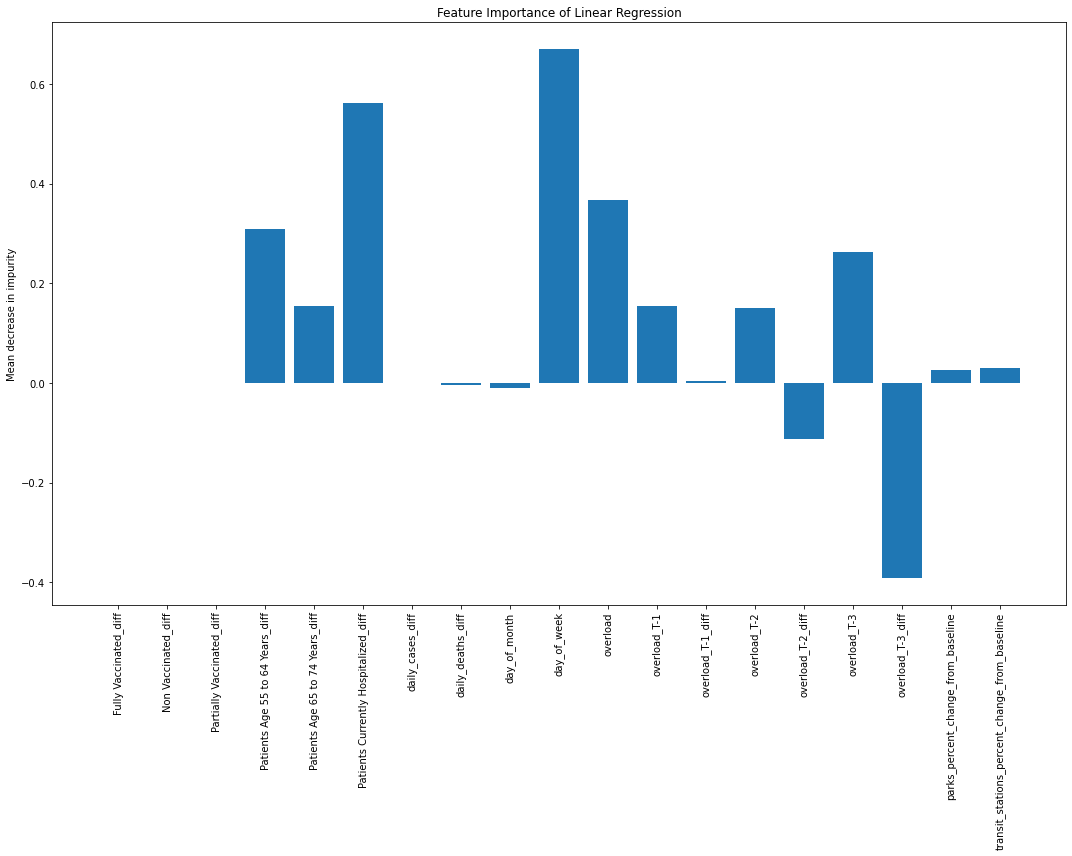

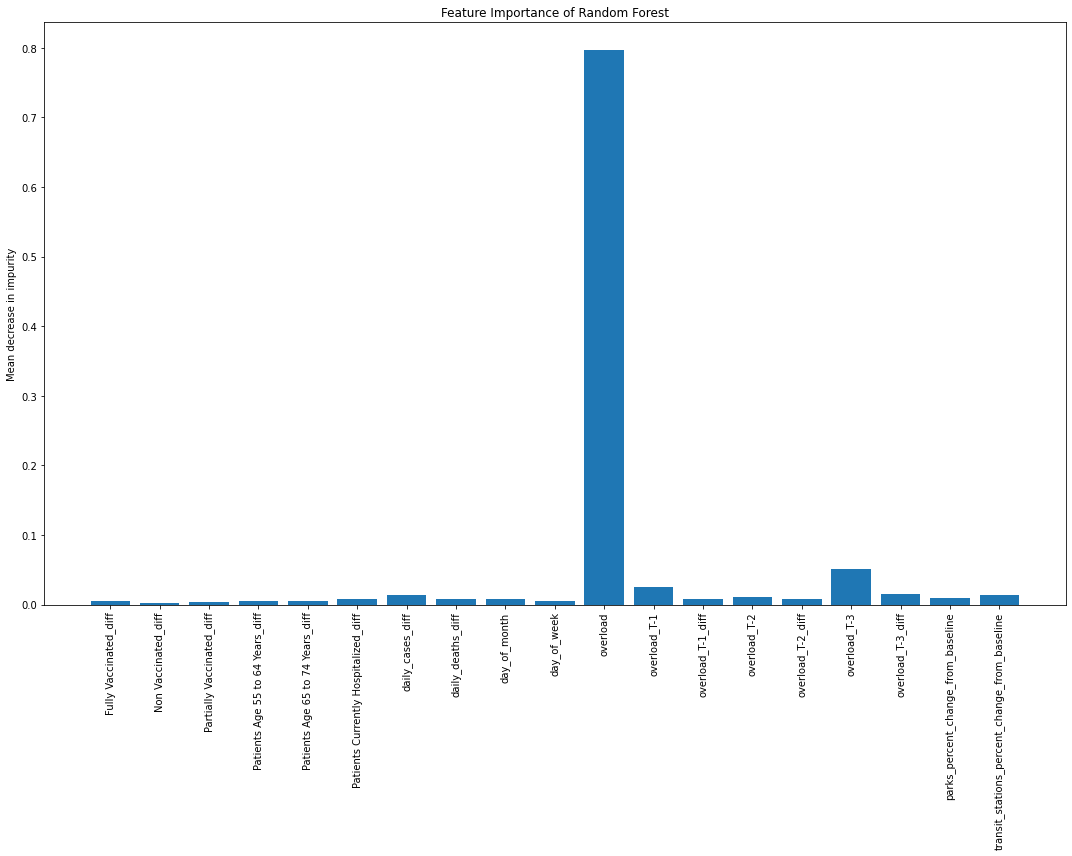

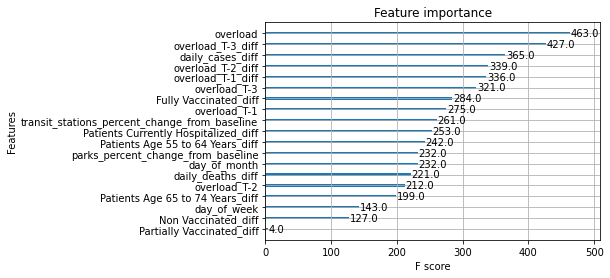

In [14]:
import importlib
import helper
import xgboost
importlib.reload(helper)
#Feature Importance of LR
_model = feature_importances['LR'][1]
fig_name = 'LR_feature_importance_plot_v3'
helper.plot_feature_importance(_model, title="Feature Importance of Linear Regression", save_fig=fig_name)

#Feature Importance of RF
_model = feature_importances['RF'][1]
fig_name = 'RF_feature_importance_plot_v3'
helper.plot_feature_importance(_model, title="Feature Importance of Random Forest", save_fig=fig_name)

f = _model.feature_names_in_
_model = feature_importances['XGB'][1]
# _model.get_booster().feature_names = f
xgboost.plot_importance(_model.get_booster())
# helper.plot_feature_importance(_model, title="Feature Importance of XGB", x_cols=f_cols)

In [15]:
# from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import SelectKBest

# fs = SelectKBest(score_func=f_regression, k=10)
# X_selected = fs.fit_transform(X_train, y_train)

In [24]:
models[0][1].coeff_

AttributeError: 'LinearRegression' object has no attribute 'coeff_'

In [27]:
feature_importances['LR'][1].coef_

array([-1.51887475e-04,  8.18524485e-07,  2.22335948e-04,  3.09725958e-01,
        1.54623727e-01,  5.61392064e-01,  3.86315824e-04, -4.61530360e-03,
       -1.10207913e-02,  6.70329912e-01,  3.67612848e-01,  1.54467249e-01,
        3.85617896e-03,  1.50611070e-01, -1.12407533e-01,  2.63018603e-01,
       -3.91626102e-01,  2.61906618e-02,  3.05123868e-02])

In [38]:
data = pd.DataFrame(models[0][1].coef_, models[0][1].feature_names_in_, columns=['coefficient'])
data.coefficient = data.coefficient.abs()
print(data)

                                                coefficient
Fully Vaccinated_diff                          1.518875e-04
Non Vaccinated_diff                            8.185245e-07
Partially Vaccinated_diff                      2.223359e-04
Patients Age 55 to 64 Years_diff               3.097260e-01
Patients Age 65 to 74 Years_diff               1.546237e-01
Patients Currently Hospitalized_diff           5.613921e-01
daily_cases_diff                               3.863158e-04
daily_deaths_diff                              4.615304e-03
day_of_month                                   1.102079e-02
day_of_week                                    6.703299e-01
overload                                       3.676128e-01
overload_T-1                                   1.544672e-01
overload_T-1_diff                              3.856179e-03
overload_T-2                                   1.506111e-01
overload_T-2_diff                              1.124075e-01
overload_T-3                            